<a href="https://colab.research.google.com/github/manreddyr/EDA_Project/blob/main/EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis on New York City Payroll Dataset** 

![](https://i.ibb.co/frtxWLm/image-2023-06-01-20-07-57.png)

## **Introduction**

Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.
EDA is primarily used to get a better understanding of data set variables and the relationships between them.

**Context**

This dataset contains the salary, pay rate, and total compensation of every New York City employee. In this dataset this information is provided for the 2014, 2015, 2016, and 2017 fiscal years, and provides a transparent lens into who gets paid how much and for what.

Note that fiscal years in the New York City budget cycle start on July 1st and end on June 30th. That means that this dataset contains, in its sum, compensation information for all City of New York employees for the period July 1, 2014 to June 30, 2017.

**Acknowledgements**:

This information was published as-is by the City of New York.

Identify a dataset for analysis Explore techniques to work with large data sets Pre-process or prepare the data for analysis Transform the data into various summary views We will use our framework to ask and answer interesting questions, create visualisations for the following areas of interest:

**`CAUTION`**: I recommed opening and running this notebook on Google Colab due large size of the dataset.

Large dataset: binder runs into issues Ease of navigation with Colab table of contents: This is a long notebook.

###**About Data**

In this analysis we will use the New York City-Citywide Payroll dataset on [Kaggle](https://www.kaggle.com/datasets/new-york-city/nyc-citywide-payroll-data).

The Kaggle dataset has a `.csv` file
- Citywide_Payroll_Data__Fiscal_Year_.csv that has **2.2 million** records.

**We will build the framework with and perform the analysis on the `Citywide_Payroll_Data__Fiscal_Year_.csv`.** 

 `Sales.csv` file has the following structure of 16 columns

1. `Fiscal Year`: Financial Year of employees payroll.
2. `Agency Name`: Agency or Department that pays the employees.
3. `First Name`: First Name of the employee working the Agency.
4. `Last Name`: Last Name of the employee. 
5. `Mid Init`: Initial in the name of the employee.
6. `Agency Start Date`: Date on which Agency was started.
7. `Work Location Borough`:  Borough/Subdistrcit where Agency is situated.
8. `Title Description`: Title of the job role of the employee.
9. `Leave Status as of June 30`: Working status of the employees as of June 30 of that fiscal year.
10. `Base Salary`: Basic salary of the employee.
11. `Pay Basis`: Time period of the pay to employee.
12. `Regular Hours`: Numebr of hours the employee has worked in a fiscal year.
13. `Regular Gross Paid`: Gross pay based on regular hours of the employee annually.
14. `OT Hours`: Number of over time hours the employee has worked for each fiscal year.
15. `Total OT Paid`:  Total amount paid to employee based on number of over time hours for each fiscal year
16. `Total Other Pay`: Extra pay or bonus pay that employee is paid by the agency for the fiscal year.


###**`Steps:`**


1. Install the required libraries.
2. Load the Data(Select required column, downcasting the dtypes, working with sample of data )
3. Find the Null values
4. Replace the Null values
5. Duplicate values
6. Unique values in the data
7. Filter the Data
8. Correlation Plot - EDA
9. Perform aggregation, grouping over the data
10. Plot the graph using plotly, matplotlib, seaborn & folium

## **Install packages and import libraries**

In [ ]:
!pip install jovian --upgrade --quiet 

import jovian

jovian.set_project("New York Payroll Data Analysis")

jovian.set_colab_id("1vrLH8BhzAmhSceNFLMcZi3rR_zkTnXng")

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install opendatasets -q
!pip install folium -q
!pip install pandas -q

In [ ]:
# User interact with the native OS Python is currently running on
import os

# Import python data analysis libraries
import pandas as pd 
import numpy as np 
from datetime import datetime


# Import library to download data from Kaggle
!pip install opendatasets --upgrade --q
import opendatasets as od

# Import visualisation libraries
import folium
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from pylab import rcParams
import datetime

# Set plot parameters for the notebook
%matplotlib inline
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.facecolor'] = '#00000000'

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

### **Data download**

In [ ]:
download_url = 'https://www.kaggle.com/datasets/new-york-city/nyc-citywide-payroll-data' #kaggle URL of the dataset

od.download(download_url)  # downloading the dataset

Skipping, found downloaded files in "./nyc-citywide-payroll-data" (use force=True to force download)


In [ ]:
new_york_payroll_data='./nyc-citywide-payroll-data/Citywide_Payroll_Data__Fiscal_Year_.csv' # assigning path of the downloaded file to a variable

The data has been downloaded and unzipped to the folder ``nyc-citywide-payroll-data``.Let us now check the size of the folder. There is one file in the folder.

Citywide_Payroll_Data__Fiscal_Year_`.csv`

In [ ]:
!ls -lh /content/nyc-citywide-payroll-data/Citywide_Payroll_Data__Fiscal_Year_.csv 

-rw-r--r-- 1 root root 396M Jun  3 01:59 /content/nyc-citywide-payroll-data/Citywide_Payroll_Data__Fiscal_Year_.csv


`Citywide_Payroll_Data__Fiscal_Year_.csv` is `391 MB` in size.

In [ ]:
%%time           
payroll_df=pd.read_csv(new_york_payroll_data)

CPU times: user 5.74 s, sys: 2.88 s, total: 8.62 s
Wall time: 13.1 s


In [ ]:
payroll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2194488 entries, 0 to 2194487
Data columns (total 16 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Fiscal Year                 int64  
 1   Agency Name                 object 
 2   Last Name                   object 
 3   First Name                  object 
 4   Mid Init                    object 
 5   Agency Start Date           object 
 6   Work Location Borough       object 
 7   Title Description           object 
 8   Leave Status as of June 30  object 
 9   Base Salary                 object 
 10  Pay Basis                   object 
 11  Regular Hours               float64
 12  Regular Gross Paid          object 
 13  OT Hours                    float64
 14  Total OT Paid               object 
 15  Total Other Pay             object 
dtypes: float64(2), int64(1), object(13)
memory usage: 267.9+ MB


### Loading Only requried columns and downcasting dtypes.
Every column from original dataset is useful for analysis, so every column is retained.

Note : In case any column is redundant or not useful to analysis then removing those columns improves memory management and loading time.

In [ ]:
selected_cols = ["Fiscal Year","Agency Name","Last Name","First Name","Mid Init","Agency Start Date","Work Location Borough","Title Description","Leave Status as of June 30","Base Salary","Pay Basis","Regular Hours","Regular Gross Paid","OT Hours","Total OT Paid","Total Other Pay"]

selected_dtypes = {
    'Fiscal Year':'int16',
    'Regular Hours': 'float32',
    'OT Hours':'float32',
}

In [ ]:
%%time
df=pd.read_csv(new_york_payroll_data, usecols=selected_cols, dtype=selected_dtypes)

CPU times: user 4.7 s, sys: 444 ms, total: 5.15 s
Wall time: 5.42 s


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2194488 entries, 0 to 2194487
Data columns (total 16 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Fiscal Year                 int16  
 1   Agency Name                 object 
 2   Last Name                   object 
 3   First Name                  object 
 4   Mid Init                    object 
 5   Agency Start Date           object 
 6   Work Location Borough       object 
 7   Title Description           object 
 8   Leave Status as of June 30  object 
 9   Base Salary                 object 
 10  Pay Basis                   object 
 11  Regular Hours               float32
 12  Regular Gross Paid          object 
 13  OT Hours                    float32
 14  Total OT Paid               object 
 15  Total Other Pay             object 
dtypes: float32(2), int16(1), object(13)
memory usage: 238.6+ MB


###**Data pre-processing**
Now that we have loaded the data into a Pandas dataframe, let us process the data for the following

Merge relavent dataset into one
drop/impute missing values
drop duplicates
downcasting
check for the outliers
You could analyse the data more to further clean up the data.

In [ ]:
df

,Fiscal Year,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2016,DISTRICT ATTORNEY-MANHATTAN,ABA'AHMID,RAHASHEEM,E,07/14/2003,MANHATTAN,COMMUNITY ASSOCIATE ...,ACTIVE,$47678.00,per Annum,"1,830.00",$47166.03,2.25,$57.28,$0.00
1,2016,DISTRICT ATTORNEY-MANHATTAN,ABENSUR,MARGARET,NaN,06/12/1995,MANHATTAN,ADMINISTRATIVE ACCOUNTANT ...,ACTIVE,$119959.00,per Annum,"1,831.00",$119042.50,0.00,$0.00,$0.00
2,2016,DISTRICT ATTORNEY-MANHATTAN,ABOUNAOUM,ANDREA,L,10/11/2011,MANHATTAN,COMMUNITY ASSOCIATE ...,ON LEAVE,$39966.00,per Annum,"1,181.68",$27452.62,1.00,$21.34,$33.00
3,2016,DISTRICT ATTORNEY-MANHATTAN,ABRAHAM,JONATHAN,J,12/01/2014,MANHATTAN,COMPUTER SYSTEMS MANAGER ...,ACTIVE,$116000.00,per Annum,"1,831.00",$115104.57,0.00,$0.00,$0.00
4,2016,DISTRICT ATTORNEY-MANHATTAN,ABRAMS,JOSEPH,NaN,05/21/2015,MANHATTAN,COLLEGE AIDE ...,CEASED,$1.00,per Hour,0.00,$3500.00,0.00,$0.00,$0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194483,2017,DISTRICT ATTORNEY-SPECIAL NARC,XXX,XXX,G,10/02/2006,MANHATTAN,SUPERVISING RACKETS INVESTIGATOR,ACTIVE,$80643.00,per Annum,"2,051.43",$87321.90,113.00,$7667.53,$3624.24
2194484,2017,DISTRICT ATTORNEY-SPECIAL NARC,XXX,XXX,C,01/18/2000,MANHATTAN,SUPERVISING RACKETS INVESTIGATOR,ACTIVE,$88883.00,per Annum,"2,051.43",$99746.21,117.00,$9491.90,$3624.24
2194485,2017,DISTRICT ATTORNEY-SPECIAL NARC,XXX,XXX,NaN,03/17/1997,MANHATTAN,SUPERVISING RACKETS INVESTIGATOR,ACTIVE,$89686.00,per Annum,"2,051.43",$96646.24,63.00,$4937.42,$3624.24
2194486,2017,DISTRICT ATTORNEY-SPECIAL NARC,XXX,XXX,J,04/19/1993,MANHATTAN,SUPERVISING RACKETS INVESTIGATOR,ACTIVE,$94245.00,per Annum,"2,051.43",$105281.70,22.00,$1544.83,$3624.24


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2194488 entries, 0 to 2194487
Data columns (total 16 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Fiscal Year                 int16  
 1   Agency Name                 object 
 2   Last Name                   object 
 3   First Name                  object 
 4   Mid Init                    object 
 5   Agency Start Date           object 
 6   Work Location Borough       object 
 7   Title Description           object 
 8   Leave Status as of June 30  object 
 9   Base Salary                 object 
 10  Pay Basis                   object 
 11  Regular Hours               float32
 12  Regular Gross Paid          object 
 13  OT Hours                    float32
 14  Total OT Paid               object 
 15  Total Other Pay             object 
dtypes: float32(2), int16(1), object(13)
memory usage: 238.6+ MB


In [ ]:
df.count()

Fiscal Year                   2194488
Agency Name                   2194488
Last Name                     2193546
First Name                    2193536
Mid Init                      1304480
Agency Start Date             2194488
Work Location Borough         1688274
Title Description             2194467
Leave Status as of June 30    2194488
Base Salary                   2194488
Pay Basis                     2194488
Regular Hours                 2194488
Regular Gross Paid            2194488
OT Hours                      2194488
Total OT Paid                 2194488
Total Other Pay               2194488
dtype: int64

In [ ]:
df.columns

Index(['Fiscal Year', 'Agency Name', 'Last Name', 'First Name', 'Mid Init',
       'Agency Start Date', 'Work Location Borough', 'Title Description',
       'Leave Status as of June 30', 'Base Salary', 'Pay Basis',
       'Regular Hours', 'Regular Gross Paid', 'OT Hours', 'Total OT Paid',
       'Total Other Pay'],
      dtype='object')

### **Data Cleaning**

#### **Handling missing data**

Dropping/imputing missing values

In [ ]:
df.isna().sum() # checking for number of null values

Fiscal Year                        0
Agency Name                        0
Last Name                        942
First Name                       952
Mid Init                      890008
Agency Start Date                  0
Work Location Borough         506214
Title Description                 21
Leave Status as of June 30         0
Base Salary                        0
Pay Basis                          0
Regular Hours                      0
Regular Gross Paid                 0
OT Hours                           0
Total OT Paid                      0
Total Other Pay                    0
dtype: int64

In [ ]:
df["First Name"].fillna("Unknown", inplace = True)
df["Mid Init"].fillna("", inplace = True)
df["Last Name"].fillna("Unknown", inplace = True)
df["Work Location Borough"].fillna("Other", inplace = True)
df["Title Description"].fillna("Unknown", inplace = True)

In [ ]:
df.isna().sum() # null values have been removed

Fiscal Year                   0
Agency Name                   0
Last Name                     0
First Name                    0
Mid Init                      0
Agency Start Date             0
Work Location Borough         0
Title Description             0
Leave Status as of June 30    0
Base Salary                   0
Pay Basis                     0
Regular Hours                 0
Regular Gross Paid            0
OT Hours                      0
Total OT Paid                 0
Total Other Pay               0
dtype: int64

In [ ]:
# Correcting the name columns.
df['First Name'].str.contains('XXX').value_counts()
df['First Name'] = df['First Name'].replace(['Unknown'],'')
df['Last Name'].str.contains('XXX').value_counts()
df['Last Name'] = df['Last Name'].replace(['Unknown'],'')

In [ ]:
#merging 3 columns of names to get 1 column
df["Full Name"]=df["First Name"]+" "+df["Mid Init"]+" "+df["Last Name"] 
df

,Fiscal Year,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,Full Name
0,2016,DISTRICT ATTORNEY-MANHATTAN,ABA'AHMID,RAHASHEEM,E,07/14/2003,MANHATTAN,COMMUNITY ASSOCIATE ...,ACTIVE,$47678.00,per Annum,"1,830.00",$47166.03,2.25,$57.28,$0.00,RAHASHEEM E ABA'AHMID
1,2016,DISTRICT ATTORNEY-MANHATTAN,ABENSUR,MARGARET,,06/12/1995,MANHATTAN,ADMINISTRATIVE ACCOUNTANT ...,ACTIVE,$119959.00,per Annum,"1,831.00",$119042.50,0.00,$0.00,$0.00,MARGARET ABENSUR
2,2016,DISTRICT ATTORNEY-MANHATTAN,ABOUNAOUM,ANDREA,L,10/11/2011,MANHATTAN,COMMUNITY ASSOCIATE ...,ON LEAVE,$39966.00,per Annum,"1,181.68",$27452.62,1.00,$21.34,$33.00,ANDREA L ABOUNAOUM
3,2016,DISTRICT ATTORNEY-MANHATTAN,ABRAHAM,JONATHAN,J,12/01/2014,MANHATTAN,COMPUTER SYSTEMS MANAGER ...,ACTIVE,$116000.00,per Annum,"1,831.00",$115104.57,0.00,$0.00,$0.00,JONATHAN J ABRAHAM
4,2016,DISTRICT ATTORNEY-MANHATTAN,ABRAMS,JOSEPH,,05/21/2015,MANHATTAN,COLLEGE AIDE ...,CEASED,$1.00,per Hour,0.00,$3500.00,0.00,$0.00,$0.00,JOSEPH ABRAMS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194483,2017,DISTRICT ATTORNEY-SPECIAL NARC,XXX,XXX,G,10/02/2006,MANHATTAN,SUPERVISING RACKETS INVESTIGATOR,ACTIVE,$80643.00,per Annum,"2,051.43",$87321.90,113.00,$7667.53,$3624.24,XXX G XXX
2194484,2017,DISTRICT ATTORNEY-SPECIAL NARC,XXX,XXX,C,01/18/2000,MANHATTAN,SUPERVISING RACKETS INVESTIGATOR,ACTIVE,$88883.00,per Annum,"2,051.43",$99746.21,117.00,$9491.90,$3624.24,XXX C XXX
2194485,2017,DISTRICT ATTORNEY-SPECIAL NARC,XXX,XXX,,03/17/1997,MANHATTAN,SUPERVISING RACKETS INVESTIGATOR,ACTIVE,$89686.00,per Annum,"2,051.43",$96646.24,63.00,$4937.42,$3624.24,XXX XXX
2194486,2017,DISTRICT ATTORNEY-SPECIAL NARC,XXX,XXX,J,04/19/1993,MANHATTAN,SUPERVISING RACKETS INVESTIGATOR,ACTIVE,$94245.00,per Annum,"2,051.43",$105281.70,22.00,$1544.83,$3624.24,XXX J XXX


In [ ]:
# rearranging columns for better visiblity
df=df.iloc[:,[0,1,16,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]

In [ ]:
# deleting unwanted columns
del df["First Name"]
del df["Mid Init"]
del df["Last Name"]

In [ ]:
df["Base Salary"] = df["Base Salary"].replace('[\$,]', '', regex=True).astype('float32')
df["Regular Gross Paid"] = df["Regular Gross Paid"].replace('[\$,]', '', regex=True).astype('float32')
df["Total OT Paid"] = df["Total OT Paid"].replace('[\$,]', '', regex=True).astype('float32')
df["Total Other Pay"] = df["Total Other Pay"].replace('[\$,]', '', regex=True).astype('float32')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2194488 entries, 0 to 2194487
Data columns (total 14 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Fiscal Year                 int16  
 1   Agency Name                 object 
 2   Full Name                   object 
 3   Agency Start Date           object 
 4   Work Location Borough       object 
 5   Title Description           object 
 6   Leave Status as of June 30  object 
 7   Base Salary                 float32
 8   Pay Basis                   object 
 9   Regular Hours               float32
 10  Regular Gross Paid          float32
 11  OT Hours                    float32
 12  Total OT Paid               float32
 13  Total Other Pay             float32
dtypes: float32(6), int16(1), object(7)
memory usage: 171.6+ MB


In [ ]:
df.head()

,Fiscal Year,Agency Name,Full Name,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2016,DISTRICT ATTORNEY-MANHATTAN,RAHASHEEM E ABA'AHMID,07/14/2003,MANHATTAN,COMMUNITY ASSOCIATE ...,ACTIVE,"47,678.00",per Annum,"1,830.00","47,166.03",2.25,57.28,0.00
1,2016,DISTRICT ATTORNEY-MANHATTAN,MARGARET ABENSUR,06/12/1995,MANHATTAN,ADMINISTRATIVE ACCOUNTANT ...,ACTIVE,"119,959.00",per Annum,"1,831.00","119,042.50",0.00,0.00,0.00
2,2016,DISTRICT ATTORNEY-MANHATTAN,ANDREA L ABOUNAOUM,10/11/2011,MANHATTAN,COMMUNITY ASSOCIATE ...,ON LEAVE,"39,966.00",per Annum,"1,181.68","27,452.62",1.00,21.34,33.00
3,2016,DISTRICT ATTORNEY-MANHATTAN,JONATHAN J ABRAHAM,12/01/2014,MANHATTAN,COMPUTER SYSTEMS MANAGER ...,ACTIVE,"116,000.00",per Annum,"1,831.00","115,104.57",0.00,0.00,0.00
4,2016,DISTRICT ATTORNEY-MANHATTAN,JOSEPH ABRAMS,05/21/2015,MANHATTAN,COLLEGE AIDE ...,CEASED,1.00,per Hour,0.00,"3,500.00",0.00,0.00,0.00


#### Looking for unqiue values and making corrections column values.

In [ ]:
print(df["Fiscal Year"].unique().size)
print(df["Fiscal Year"].unique())

4
[2016 2015 2014 2017]


In [ ]:
print(df["Agency Name"].unique().size)
print(df["Agency Name"].unique())

165
['DISTRICT ATTORNEY-MANHATTAN   ' 'POLICE DEPARTMENT'
 'DISTRICT ATTORNEY KINGS COUNTY' 'DISTRICT ATTORNEY QNS COUNTY  '
 'BRONX DISTRICT ATTORNEY       ' 'DISTRICT ATTORNEY RICHMOND COU'
 'POLICE DEPARTMENT             ' "ADMIN FOR CHILDREN'S SVCS     "
 'ADMIN TRIALS AND HEARINGS     ' 'BOARD OF ELECTION POLL WORKERS'
 'BOROUGH PRESIDENT-QUEENS      ' 'DISTRICT ATTORNEY-SPECIAL NARC'
 'BOARD OF CORRECTION           ' 'BOARD OF ELECTION             '
 'BOROUGH PRESIDENT-BRONX       ' 'BOROUGH PRESIDENT-BROOKLYN    '
 'BOROUGH PRESIDENT-STATEN IS   ' 'BRONX COMMUNITY BOARD #1      '
 'BRONX COMMUNITY BOARD #10     ' 'BRONX COMMUNITY BOARD #11     '
 'BRONX COMMUNITY BOARD #12     ' 'BRONX COMMUNITY BOARD #2      '
 'BRONX COMMUNITY BOARD #3      ' 'BRONX COMMUNITY BOARD #4      '
 'BRONX COMMUNITY BOARD #5      ' 'BRONX COMMUNITY BOARD #6      '
 'BRONX COMMUNITY BOARD #7      ' 'BRONX COMMUNITY BOARD #8      '
 'BRONX COMMUNITY BOARD #9      ' 'BROOKLYN COMMUNITY BOARD #1   '
 'BR

In [ ]:
df["Agency Name"]=df["Agency Name"].str.strip()

In [ ]:
print(df["Agency Name"].unique().size) 

164


In [ ]:
print(df["Work Location Borough"].unique().size)
print(df["Work Location Borough"].unique())

28
['MANHATTAN    ' 'MANHATTAN' 'RICHMOND' 'QUEENS' 'BRONX' 'BROOKLYN'
 'BROOKLYN     ' 'OTHER        ' 'QUEENS       ' 'BRONX        '
 'RICHMOND     ' 'ALBANY       ' 'DELAWARE     ' 'NASSAU       '
 'SULLIVAN     ' 'ORANGE       ' 'WESTCHESTER  ' 'Other' 'ULSTER       '
 'PUTNAM       ' 'DUTCHESS     ' 'SCHOHARIE    ' 'GREENE       '
 'WASHINGTON DC' 'Bronx' 'Queens' 'Richmond' 'Manhattan']


In [ ]:
df["Work Location Borough"]=df["Work Location Borough"].str.strip()
df["Work Location Borough"]=df["Work Location Borough"].str.capitalize()

In [ ]:
print(df["Work Location Borough"].unique().size)
print(df["Work Location Borough"].unique())

18
['Manhattan' 'Richmond' 'Queens' 'Bronx' 'Brooklyn' 'Other' 'Albany'
 'Delaware' 'Nassau' 'Sullivan' 'Orange' 'Westchester' 'Ulster' 'Putnam'
 'Dutchess' 'Schoharie' 'Greene' 'Washington dc']


In [ ]:
print(df["Title Description"].unique().size)
print(df["Title Description"].unique())

1964
['COMMUNITY ASSOCIATE                                         '
 'ADMINISTRATIVE ACCOUNTANT                                   '
 'COMPUTER SYSTEMS MANAGER                                    ' ...
 'CAPTAIN DETAILED AS CHIEF OF CRIME CONTROL STRATEGIES       '
 'CAPTAIN D/A CHIEF OF MANAGEMENT ANALYSIS AND PLANNING       '
 'SUPERVISING RACKETS INVESTIGATOR     ']


In [ ]:
df['Title Description'] = df['Title Description'].str.strip()

In [ ]:
print(df["Title Description"].unique().size)

1640


In [ ]:
df.rename(columns = {'Leave Status as of June 30':'Leave Status'}, inplace = True)

In [ ]:
df.head()

,Fiscal Year,Agency Name,Full Name,Agency Start Date,Work Location Borough,Title Description,Leave Status,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2016,DISTRICT ATTORNEY-MANHATTAN,RAHASHEEM E ABA'AHMID,07/14/2003,Manhattan,COMMUNITY ASSOCIATE,ACTIVE,"47,678.00",per Annum,"1,830.00","47,166.03",2.25,57.28,0.00
1,2016,DISTRICT ATTORNEY-MANHATTAN,MARGARET ABENSUR,06/12/1995,Manhattan,ADMINISTRATIVE ACCOUNTANT,ACTIVE,"119,959.00",per Annum,"1,831.00","119,042.50",0.00,0.00,0.00
2,2016,DISTRICT ATTORNEY-MANHATTAN,ANDREA L ABOUNAOUM,10/11/2011,Manhattan,COMMUNITY ASSOCIATE,ON LEAVE,"39,966.00",per Annum,"1,181.68","27,452.62",1.00,21.34,33.00
3,2016,DISTRICT ATTORNEY-MANHATTAN,JONATHAN J ABRAHAM,12/01/2014,Manhattan,COMPUTER SYSTEMS MANAGER,ACTIVE,"116,000.00",per Annum,"1,831.00","115,104.57",0.00,0.00,0.00
4,2016,DISTRICT ATTORNEY-MANHATTAN,JOSEPH ABRAMS,05/21/2015,Manhattan,COLLEGE AIDE,CEASED,1.00,per Hour,0.00,"3,500.00",0.00,0.00,0.00


In [ ]:
print(df["Leave Status"].unique().size)
print(df["Leave Status"].unique())

5
['ACTIVE' 'ON LEAVE' 'CEASED' 'ON SEPARATION LEAVE' 'SEASONAL']


In [ ]:
print(df["Pay Basis"].unique().size)
print(df["Pay Basis"].unique())

8
[' per Annum' ' per Hour' ' per Day' 'per Annum' 'per Hour'
 ' Prorated Annual' 'per Day' 'Prorated Annual']


In [ ]:
df["Pay Basis"]=df["Pay Basis"].str.strip()
df["Pay Basis"]=df["Pay Basis"].str.capitalize()

In [ ]:
print(df["Pay Basis"].unique().size)
print(df["Pay Basis"].unique())

4
['Per annum' 'Per hour' 'Per day' 'Prorated annual']


#### Merging and creating new columns for more numeric data

In [ ]:
df["Total_Work_Hours"]=df["Regular Hours"]+df["OT Hours"]

In [ ]:
df["Total Pay"]=df["Regular Gross Paid"]+df["Total OT Paid"]+df["Total Other Pay"]

In [ ]:
df['Agency Start Date'] = pd.to_datetime(df['Agency Start Date'],format = '%m/%d/%Y',errors="coerce")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2194488 entries, 0 to 2194487
Data columns (total 16 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Fiscal Year            int16         
 1   Agency Name            object        
 2   Full Name              object        
 3   Agency Start Date      datetime64[ns]
 4   Work Location Borough  object        
 5   Title Description      object        
 6   Leave Status           object        
 7   Base Salary            float32       
 8   Pay Basis              object        
 9   Regular Hours          float32       
 10  Regular Gross Paid     float32       
 11  OT Hours               float32       
 12  Total OT Paid          float32       
 13  Total Other Pay        float32       
 14  Total_Work_Hours       float32       
 15  Total Pay              float32       
dtypes: datetime64[ns](1), float32(8), int16(1), object(6)
memory usage: 188.4+ MB


In [ ]:
df.head(10)

,Fiscal Year,Agency Name,Full Name,Agency Start Date,Work Location Borough,Title Description,Leave Status,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,Total_Work_Hours,Total Pay
0,2016,DISTRICT ATTORNEY-MANHATTAN,RAHASHEEM E ABA'AHMID,2003-07-14,Manhattan,COMMUNITY ASSOCIATE,ACTIVE,"47,678.00",Per annum,"1,830.00","47,166.03",2.25,57.28,0.00,"1,832.25","47,223.31"
1,2016,DISTRICT ATTORNEY-MANHATTAN,MARGARET ABENSUR,1995-06-12,Manhattan,ADMINISTRATIVE ACCOUNTANT,ACTIVE,"119,959.00",Per annum,"1,831.00","119,042.50",0.00,0.00,0.00,"1,831.00","119,042.50"
2,2016,DISTRICT ATTORNEY-MANHATTAN,ANDREA L ABOUNAOUM,2011-10-11,Manhattan,COMMUNITY ASSOCIATE,ON LEAVE,"39,966.00",Per annum,"1,181.68","27,452.62",1.00,21.34,33.00,"1,182.68","27,506.96"
3,2016,DISTRICT ATTORNEY-MANHATTAN,JONATHAN J ABRAHAM,2014-12-01,Manhattan,COMPUTER SYSTEMS MANAGER,ACTIVE,"116,000.00",Per annum,"1,831.00","115,104.57",0.00,0.00,0.00,"1,831.00","115,104.57"
4,2016,DISTRICT ATTORNEY-MANHATTAN,JOSEPH ABRAMS,2015-05-21,Manhattan,COLLEGE AIDE,CEASED,1.00,Per hour,0.00,"3,500.00",0.00,0.00,0.00,0.00,"3,500.00"
5,2016,DISTRICT ATTORNEY-MANHATTAN,JENNIFER ABREU,2012-09-04,Manhattan,ASSISTANT DISTRICT ATTORNEY,ACTIVE,"71,500.00",Per annum,"1,831.00","71,967.34",0.00,0.00,0.00,"1,831.00","71,967.34"
6,2016,DISTRICT ATTORNEY-MANHATTAN,JUAN D ABREU,2007-09-04,Manhattan,ASSISTANT DISTRICT ATTORNEY,ACTIVE,"88,000.00",Per annum,"1,831.00","87,614.01",0.00,0.00,750.00,"1,831.00","88,364.01"
7,2016,DISTRICT ATTORNEY-MANHATTAN,JENNIFER ACEVEDO,2016-06-06,Manhattan,COLLEGE AIDE,ACTIVE,1.00,Per hour,0.00,500.00,0.00,0.00,0.00,0.00,500.00
8,2016,DISTRICT ATTORNEY-MANHATTAN,MATTHEW J ACOCELLA,2014-09-02,Manhattan,COMMUNITY ASSOCIATE,CEASED,"41,000.00",Per annum,349.00,"9,507.15",0.00,0.00,0.00,349.00,"9,507.15"
9,2016,DISTRICT ATTORNEY-MANHATTAN,RITA E ACOSTA,1978-05-31,Manhattan,PRINCIPAL ADMINISTRATIVE ASSOCIATE,ACTIVE,"66,035.00",Per annum,"1,830.00","64,357.12",0.00,0.00,"3,824.72","1,830.00","68,181.84"


In [ ]:
df.describe()

,Fiscal Year,Base Salary,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,Total_Work_Hours,Total Pay
count,"2,194,488.00","2,194,488.00","2,194,488.00","2,194,488.00","2,194,488.00","2,194,488.00","2,194,488.00","2,194,488.00","2,194,488.00"
mean,"2,015.53","41,100.10",666.04,"40,190.09",59.17,"3,225.30","2,089.83",725.21,"45,505.21"
std,1.11,"39,544.75",887.61,"37,305.55",147.92,"8,825.55","4,936.87",983.38,"44,035.69"
min,"2,014.00",0.50,-730.43,"-29,862.19",-27.00,"-23,826.85","-281,595.03",-730.43,"-174,087.95"
25%,"2,015.00",33.18,0.00,"3,560.95",0.00,0.00,0.00,0.00,"3,617.72"
50%,"2,016.00","39,523.00",0.00,"34,715.85",0.00,0.00,0.00,0.00,"36,627.49"
75%,"2,017.00","76,275.00","1,825.00","71,189.35",1.00,178.74,"1,179.08","1,825.00","76,917.27"
max,"2,017.00","350,000.00","4,171.43","672,308.88","3,347.50","228,633.81","100,355.84","5,433.22","672,731.25"


In [ ]:
df.head()

,Fiscal Year,Agency Name,Full Name,Agency Start Date,Work Location Borough,Title Description,Leave Status,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,Total_Work_Hours,Total Pay
0,2016,DISTRICT ATTORNEY-MANHATTAN,RAHASHEEM E ABA'AHMID,2003-07-14,Manhattan,COMMUNITY ASSOCIATE,ACTIVE,"47,678.00",Per annum,"1,830.00","47,166.03",2.25,57.28,0.00,"1,832.25","47,223.31"
1,2016,DISTRICT ATTORNEY-MANHATTAN,MARGARET ABENSUR,1995-06-12,Manhattan,ADMINISTRATIVE ACCOUNTANT,ACTIVE,"119,959.00",Per annum,"1,831.00","119,042.50",0.00,0.00,0.00,"1,831.00","119,042.50"
2,2016,DISTRICT ATTORNEY-MANHATTAN,ANDREA L ABOUNAOUM,2011-10-11,Manhattan,COMMUNITY ASSOCIATE,ON LEAVE,"39,966.00",Per annum,"1,181.68","27,452.62",1.00,21.34,33.00,"1,182.68","27,506.96"
3,2016,DISTRICT ATTORNEY-MANHATTAN,JONATHAN J ABRAHAM,2014-12-01,Manhattan,COMPUTER SYSTEMS MANAGER,ACTIVE,"116,000.00",Per annum,"1,831.00","115,104.57",0.00,0.00,0.00,"1,831.00","115,104.57"
4,2016,DISTRICT ATTORNEY-MANHATTAN,JOSEPH ABRAMS,2015-05-21,Manhattan,COLLEGE AIDE,CEASED,1.00,Per hour,0.00,"3,500.00",0.00,0.00,0.00,0.00,"3,500.00"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2194488 entries, 0 to 2194487
Data columns (total 16 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Fiscal Year            int16         
 1   Agency Name            object        
 2   Full Name              object        
 3   Agency Start Date      datetime64[ns]
 4   Work Location Borough  object        
 5   Title Description      object        
 6   Leave Status           object        
 7   Base Salary            float32       
 8   Pay Basis              object        
 9   Regular Hours          float32       
 10  Regular Gross Paid     float32       
 11  OT Hours               float32       
 12  Total OT Paid          float32       
 13  Total Other Pay        float32       
 14  Total_Work_Hours       float32       
 15  Total Pay              float32       
dtypes: datetime64[ns](1), float32(8), int16(1), object(6)
memory usage: 188.4+ MB


In [ ]:
len(df)

2194488

#### Dropping duplicates

In [ ]:
df=df.drop_duplicates()

In [ ]:
len(df)

2194475

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2194475 entries, 0 to 2194487
Data columns (total 16 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Fiscal Year            int16         
 1   Agency Name            object        
 2   Full Name              object        
 3   Agency Start Date      datetime64[ns]
 4   Work Location Borough  object        
 5   Title Description      object        
 6   Leave Status           object        
 7   Base Salary            float32       
 8   Pay Basis              object        
 9   Regular Hours          float32       
 10  Regular Gross Paid     float32       
 11  OT Hours               float32       
 12  Total OT Paid          float32       
 13  Total Other Pay        float32       
 14  Total_Work_Hours       float32       
 15  Total Pay              float32       
dtypes: datetime64[ns](1), float32(8), int16(1), object(6)
memory usage: 205.1+ MB


Converting currency data in object dtype to flaot dtype to perform mathematical oeprations

In [ ]:
df["Base Salary"] = df["Base Salary"].astype('float32')
df["Regular Gross Paid"] = df["Regular Gross Paid"].astype('float32')
df["Total OT Paid"] = df["Total OT Paid"].astype('float32')
df["Total Other Pay"] = df["Total Other Pay"].astype('float32')
df["Total Pay"] = df["Total Pay"].astype('float32')
df["Total_Work_Hours"]=df["Total_Work_Hours"].astype('float32')

#### **Summary Statistics and Sample Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2194475 entries, 0 to 2194487
Data columns (total 16 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Fiscal Year            int16         
 1   Agency Name            object        
 2   Full Name              object        
 3   Agency Start Date      datetime64[ns]
 4   Work Location Borough  object        
 5   Title Description      object        
 6   Leave Status           object        
 7   Base Salary            float32       
 8   Pay Basis              object        
 9   Regular Hours          float32       
 10  Regular Gross Paid     float32       
 11  OT Hours               float32       
 12  Total OT Paid          float32       
 13  Total Other Pay        float32       
 14  Total_Work_Hours       float32       
 15  Total Pay              float32       
dtypes: datetime64[ns](1), float32(8), int16(1), object(6)
memory usage: 205.1+ MB


In [ ]:
df.describe()

,Fiscal Year,Base Salary,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,Total_Work_Hours,Total Pay
count,"2,194,475.00","2,194,475.00","2,194,475.00","2,194,475.00","2,194,475.00","2,194,475.00","2,194,475.00","2,194,475.00","2,194,475.00"
mean,"2,015.53","41,100.24",666.04,"40,190.25",59.17,"3,225.32","2,089.84",725.21,"45,505.43"
std,1.11,"39,544.78",887.61,"37,305.54",147.92,"8,825.58","4,936.88",983.38,"44,035.70"
min,"2,014.00",0.50,-730.43,"-29,862.19",-27.00,"-23,826.85","-281,595.03",-730.43,"-174,087.95"
25%,"2,015.00",33.18,0.00,"3,561.10",0.00,0.00,0.00,0.00,"3,617.89"
50%,"2,016.00","39,523.00",0.00,"34,716.19",0.00,0.00,0.00,0.00,"36,628.02"
75%,"2,017.00","76,275.00","1,825.00","71,190.01",1.00,178.75,"1,179.12","1,825.00","76,917.91"
max,"2,017.00","350,000.00","4,171.43","672,308.88","3,347.50","228,633.81","100,355.84","5,433.22","672,731.25"


 Data correction by changing negative value to positive value.

In [ ]:
# using abs() to convert -ve values to +ve.
df["Regular Hours"]=df["Regular Hours"].abs()
df["Regular Gross Paid"]=df["Regular Gross Paid"].abs()
df["OT Hours"]=df["OT Hours"].abs()
df["Total OT Paid"]=df["Total OT Paid"].abs()
df["Total Other Pay"]=df["Total Other Pay"].abs()
df["Total Pay"]=df["Total Pay"].abs()
df["Total_Work_Hours"]=df["Total_Work_Hours"].abs()

In [ ]:
# creating a function to define correlation
def plot_correlation(df):
  corr_matrix=df.corr()
  plt.figure(1, figsize=(12,7))
  plt.title("Correlation")
  return sns.heatmap(corr_matrix, cmap='BrBG', center=0, annot=True,  cbar=False);

Plotting correlation of the dataframe using heat map

<Axes: title={'center': 'Correlation'}>

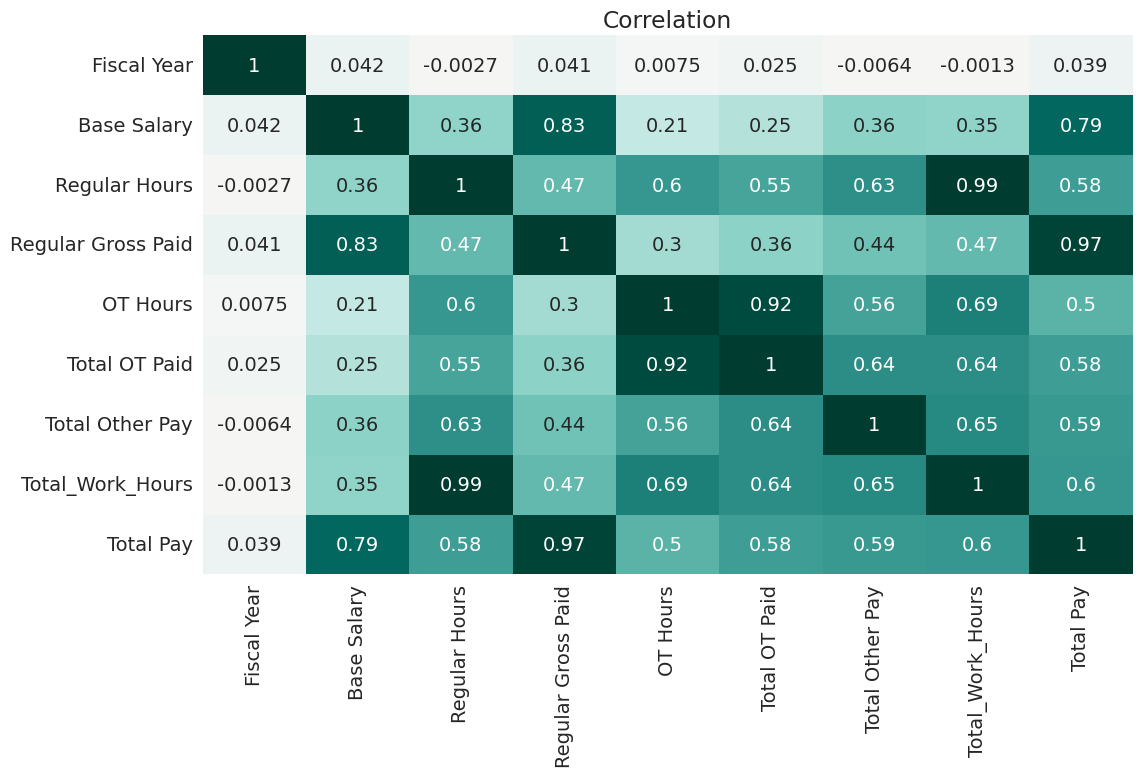

In [ ]:
plot_correlation(df)

Scatter plot to represent Base pay and Total Pay 

[Text(0.5, 1.0, 'Base Salary Vs Total Pay(Correlation)')]

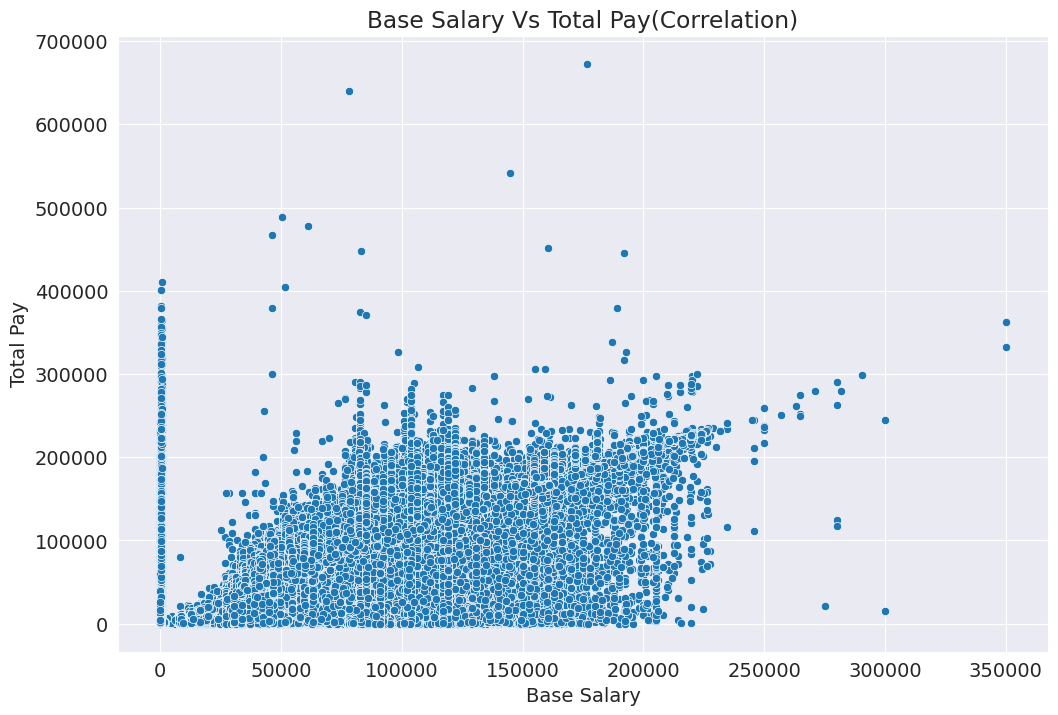

In [ ]:
sns.scatterplot(data=df, x='Base Salary', y='Total Pay').set(title='Base Salary Vs Total Pay(Correlation)')

##Exploratory Data Analysis

**Question 1 :**  _Which Job roles are paid higest and which job role has highest pay budget?_


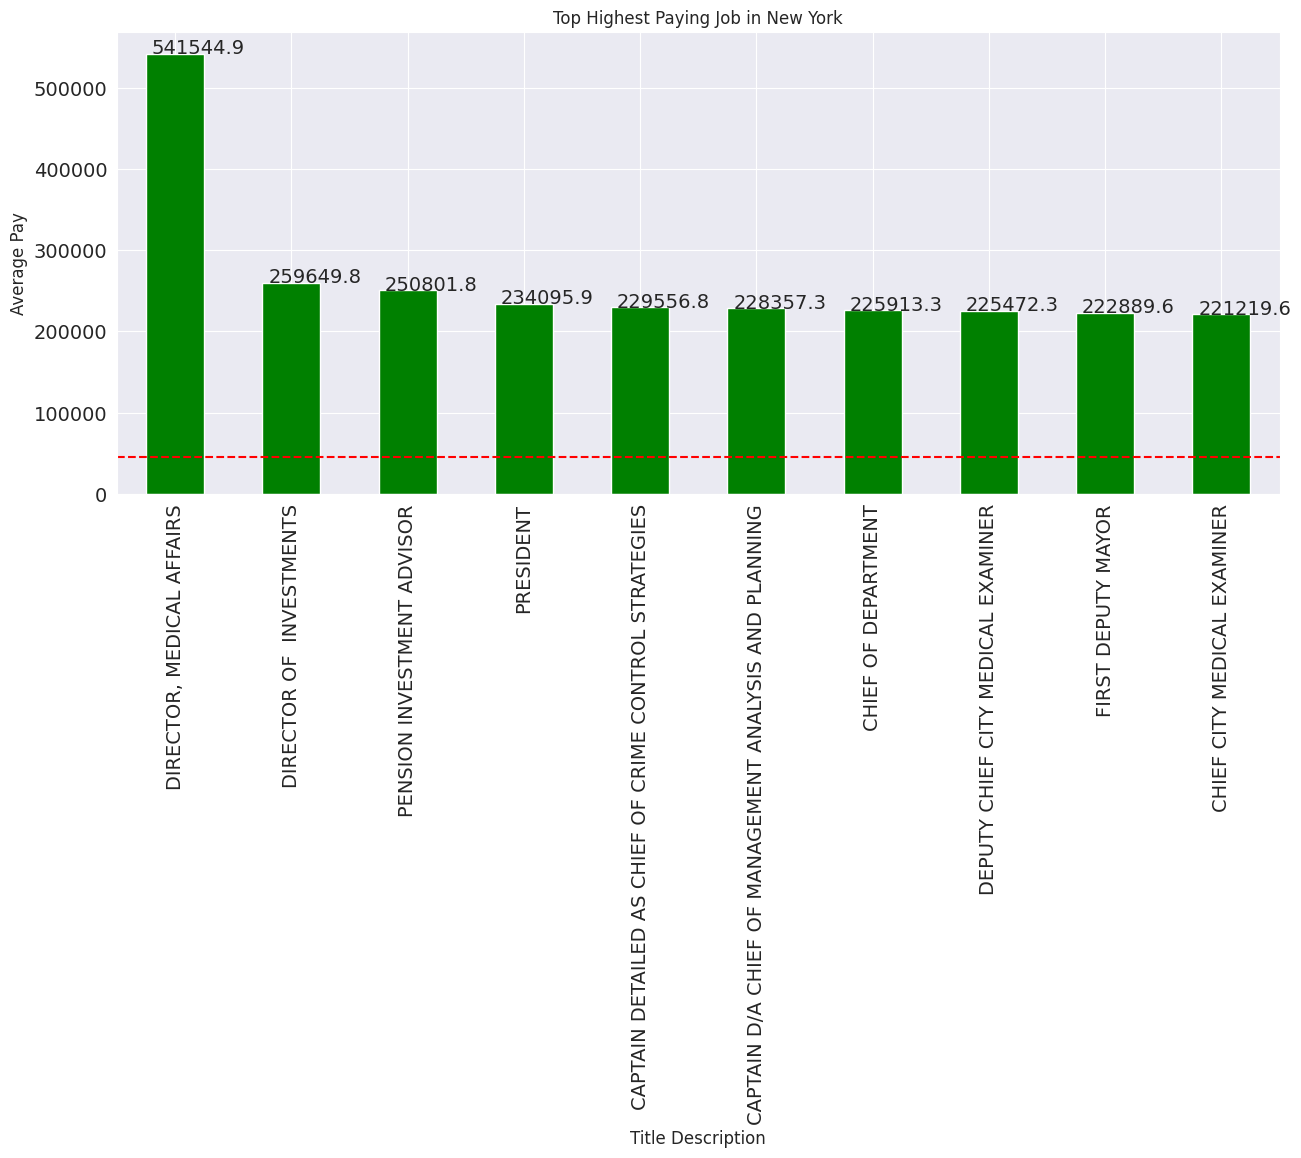

In [ ]:
plt.ticklabel_format(style='plain')  
plt.title('Top Highest Paying Job in New York',fontsize=12)
plt.ylabel('Average Pay',fontsize=12) 
plt.xlabel('Job Title',fontsize=12) 
avg_pay_diff_job = df.groupby('Title Description')['Total Pay'].mean()
sorted_avg=avg_pay_diff_job.sort_values(ascending=False).head(10)
ax=sorted_avg.plot(kind='bar',figsize=(15,6),color='green')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+1.5),fontsize=14)
avg=df['Total Pay'].mean()
plt.axhline(avg, color='red', linestyle='--')
plt.show()

In [ ]:
sorted_avg=sorted_avg.reset_index()
avg_t10=sorted_avg["Total Pay"].mean()
avg_all=df['Total Pay'].mean()
x=(avg_t10/avg_all)*100
print("On average top 10 highest paid jobs get {0:.2f}% higher than other job roles".format(x))

On average top 10 highest paid jobs get 579.91% higher than other job roles


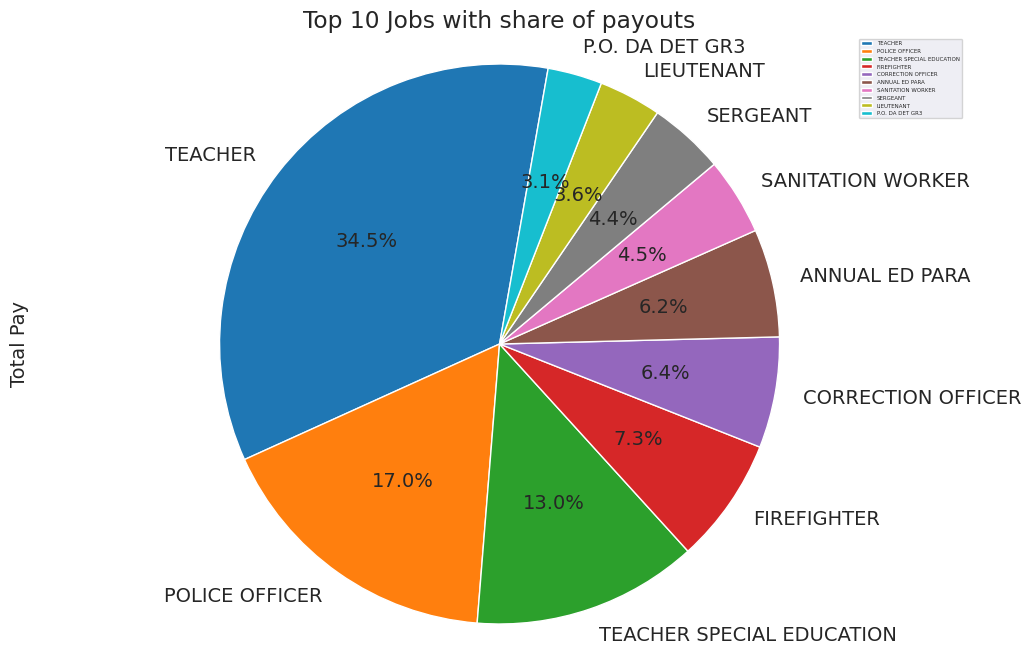

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

Higest_Payout=df.groupby('Title Description')['Total Pay'].sum().sort_values(ascending=False).reset_index()

Higest_Payout = Higest_Payout.head(10)

Higest_Payout.plot.pie(y='Total Pay', labels=Higest_Payout['Title Description'], autopct='%1.1f%%',startangle=80)

plt.legend(fontsize=4)
plt.axis('equal')
plt.title('Top 10 Jobs with share of payouts')
plt.show()

`observation :`

- Director of Medical Affaris role gets paid highest and On average top 10 highest paid jobs get 579.91% higher than other job roles

- Teacher role has highest pay budget of 34% among top 10 jobs roles with highest budget.

**Question 2 :** _What jobs have highest total hours works and correlation of pay with work hours._ 

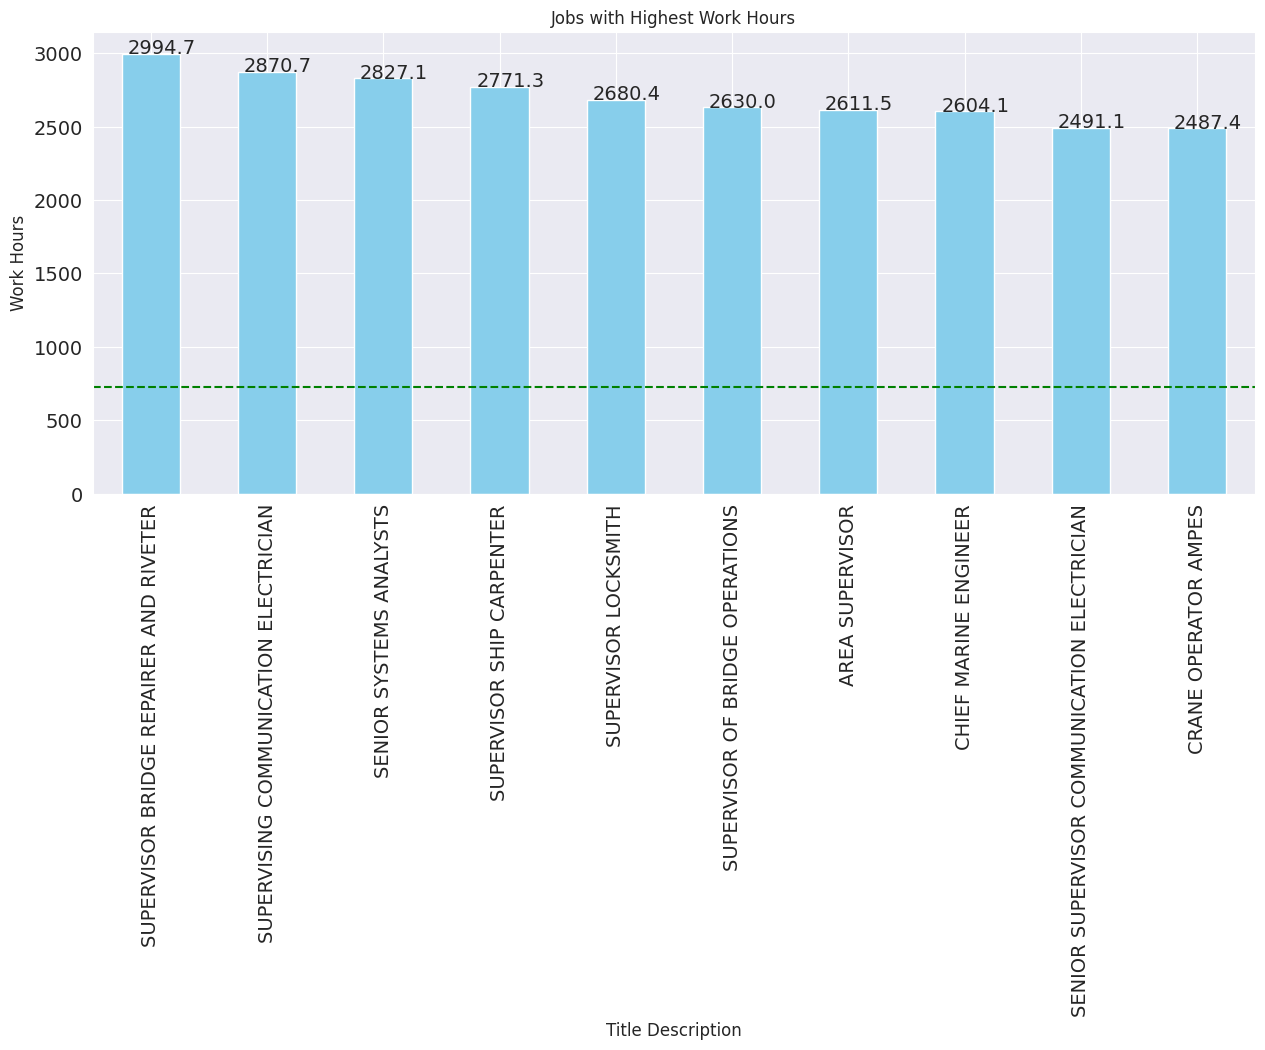

In [ ]:
plt.ticklabel_format(style='scientific')  
plt.title('Jobs with Highest Work Hours',fontsize=12)
plt.ylabel('Work Hours',fontsize=12) 
plt.xlabel('Job Title',fontsize=12) 
hours_df=df.groupby('Title Description')['Total_Work_Hours'].mean()
sorted_hours_df=hours_df.sort_values(ascending=False)
ax=sorted_hours_df.head(10).plot(kind='bar',figsize=(15,6),color='skyblue')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+1.5),fontsize=14)
avg=df['Total_Work_Hours'].mean()
plt.axhline(avg, color='green', linestyle='--')
plt.show()

In [ ]:
correlation = df['Total_Work_Hours'].corr(df['Total Pay'])
print(correlation)

0.5966522431920895


[Text(0.5, 1.0, 'Work Hours Vs Total Pay(Correlation)')]

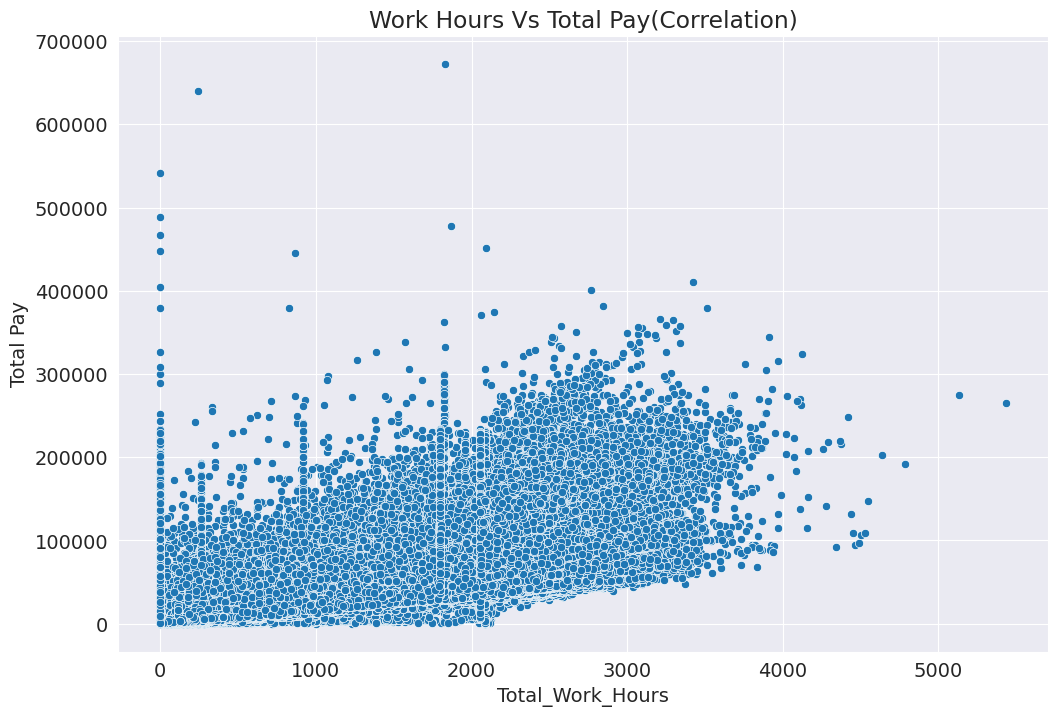

In [ ]:
sns.scatterplot(data=df, x='Total_Work_Hours', y='Total Pay').set(title='Work Hours Vs Total Pay(Correlation)')

`observation:`

- Supervision jobs in working hours of over 2000 hours per annum where as other jobs on average have around 700 hours per annum.

- Correlation between total work hours and total pay is 5.9(moderate), which implies that jobs with more working hours do not necessaryly get paid more. 



**Question 3 :** _Which Boroughs or areas have higest number of jobs and payout?_

In [ ]:
loc_df=df.groupby(["Work Location Borough"]).agg({"Title Description":'count',"Total Pay":'mean'}).sort_values("Total Pay",ascending=False)

In [ ]:
loc_df

,Title Description,Total Pay
Work Location Borough,,
Dutchess,56,"81,694.87"
Washington dc,20,"79,692.68"
Greene,29,"77,973.89"
Richmond,22808,"74,307.48"
Albany,45,"72,409.96"
Schoharie,84,"72,237.98"
Westchester,1641,"71,981.95"
Ulster,934,"68,858.69"
Sullivan,420,"67,580.01"


In [ ]:
m = folium.Map(location=[40.73241026856135, -73.88499024790747], zoom_start=6)

folium.Marker(
     location=[41.98307650013155, -73.99430486054516],
    popup="Place:Ulster  Average_Pay:$68,858.69  Total_Jobs:934",
    icon=folium.Icon(icon="cloud"),
).add_to(m)

folium.Marker(
     location=[41.7518737103863, -73.74122898479884],
    popup="Place:Dutchess  Average_Pay:$81,694.87  Total_Jobs:56",
    icon=folium.Icon(icon="cloud"),
).add_to(m)

folium.Marker(
     location=[42.33060570983524, -75.76961370611713],
    popup="Place:Greene  Average_Pay:$77,973.89  Total_Jobs:29",
    icon=folium.Icon(icon="cloud"),
).add_to(m)

folium.Marker(
     location=[42.813670156118995, -77.54127498036473],
    popup="Place:Richmond  Average_Pay:$74,307.48  Total_Jobs:22808",
    icon=folium.Icon(icon="cloud"),
).add_to(m)

folium.Marker(
     location=[41.1662336312727, -73.74679540489112],
    popup="Place:Westchester  Average_Pay:$71,981.95  Total_Jobs:1641",
    icon=folium.Icon(icon="cloud"),
).add_to(m)

folium.Marker(
     location=[43.05485558010051, -75.84707154041622],
    popup="Place:Sullivan  Average_Pay:67,580.01  Total_Jobs:420",
    icon=folium.Icon(icon="cloud"),
).add_to(m)

folium.Marker(
     location=[40.72552483795384, -73.79847394946425],
    popup="Place:Queens  Average_Pay:$63,546.22  Total_Jobs:186428",
    icon=folium.Icon(icon="cloud"),
).add_to(m)

folium.Marker(
     location=[40.65658784645835, -73.94707414409315],
    popup="Place:Brooklyn  Average_Pay:$62,740.09  Total_Jobs:164822",
    icon=folium.Icon(icon="cloud"),
).add_to(m)

folium.Marker(
     location=[40.86279647703111, -73.85982091261324],
    popup="Place:Bronx  Average_Pay:58,856.86  Total_Jobs:91165",
    icon=folium.Icon(icon="cloud"),
).add_to(m)

folium.Marker(
     location=[41.98307650013155, -73.99430486054516],
    popup="Place:Delaware  Average_Pay:64,108.88  Total_Jobs:286",
    icon=folium.Icon(icon="cloud"),
).add_to(m)

folium.Marker(
    location=[40.75695173917489, -73.98159478613998],
    popup="Place:Manhattan  Average_Pay:$37,589.57   Total_Jobs:1171006",
    icon=folium.Icon(icon="cloud"),
).add_to(m)

folium.Circle(radius=400000,color="blue",location=[40.73241026856135, -73.88499024790747],fill=False).add_to(m)

m

In [ ]:
px.bar(loc_df, x="Total Pay",color="Total Pay")

In [ ]:
sum_loc_df=df.groupby("Work Location Borough")["Total Pay"].sum().sort_values(ascending=False)

In [ ]:
px.bar(sum_loc_df, x="Total Pay",color="Total Pay")

`observation :`

- Dutchess town has highest average pay with $82,000 per annum.

- Manhattan Borough employees highest and pays highest amount of payout around $44 Billion making it most important financial hub around the world.


**Question 4 :** _Which agencies with have highest total payout in each fiscal year?_

In [ ]:
sum_of_pay_df=df.groupby(["Fiscal Year","Agency Name"])["Total Pay"].sum().reset_index()

In [ ]:
top_5_df = sum_of_pay_df.groupby('Fiscal Year').apply(lambda x: x.nlargest(5, 'Total Pay')).reset_index(drop=True)

In [ ]:
top_5_final = top_5_df.loc[:, ['Fiscal Year', 'Agency Name', 'Total Pay']]

In [ ]:
top_5_final

,Fiscal Year,Agency Name,Total Pay
0,2014,DEPT OF ED PEDAGOGICAL,"7,082,023,424.00"
1,2014,Police Department,"4,350,543,872.00"
2,2014,FIRE DEPARTMENT,"1,604,222,848.00"
3,2014,DEPARTMENT OF CORRECTION,"945,766,464.00"
4,2014,DEPARTMENT OF SANITATION,"830,424,192.00"
5,2015,DEPT OF ED PEDAGOGICAL,"7,563,603,456.00"
6,2015,POLICE DEPARTMENT,"4,599,268,352.00"
7,2015,FIRE DEPARTMENT,"1,635,847,168.00"
8,2015,DEPARTMENT OF CORRECTION,"994,970,624.00"
9,2015,DEPARTMENT OF SANITATION,"849,944,960.00"


In [ ]:
grouped = top_5_final.groupby('Fiscal Year')

In [ ]:

# create a list of bar charts for each department
bar_charts = []
for department, group in grouped:
    bar_chart = go.Bar(
        x=group['Agency Name'],
        y=group['Total Pay'],
        name=department
    )
    bar_charts.append(bar_chart)

# set the layout for the plot
layout = go.Layout(
    title='Year-wise total payout by top 5 agencies',
    xaxis=dict(title='Agency Name'),
    yaxis=dict(title='Total Pay')
)

# create the figure using the make_subplots() function
fig = make_subplots(rows=1, cols=len(bar_charts), shared_yaxes=True)

# add the bar charts to the figure using the add_trace() method
for i, bar_chart in enumerate(bar_charts):
    fig.add_trace(bar_chart, row=1, col=i+1)

# set the title and axis labels for the plot
fig.update_layout(layout)

# show the plot
fig.show()

`observation :` 
- Department of Ed Pedagogical and Police Department have been consistently paying out highest pay for all four financial years with about 7 Billion and 4 Billion US Dollars respectively per year.

**Question 5 :** _Which Agencies have highest average pay and least pay?_

In [ ]:
noe_df=df.groupby("Agency Name").agg({"Title Description":"count","Total Pay":"mean"}).sort_values("Total Pay",ascending=False).reset_index()
noe_df_low=df.groupby("Agency Name").agg({"Title Description":"count","Total Pay":"mean"}).sort_values("Total Pay",ascending=True).reset_index()
noe_df


,Agency Name,Title Description,Total Pay
0,DOE CUSTODIAL PAYROL,3912,"105,532.27"
1,BRONX COMMUNITY BOARD #3,8,"103,733.76"
2,FIRE DEPARTMENT,72556,"95,441.95"
3,FINANCIAL INFO SVCS AGENCY,1898,"94,252.39"
4,OFFICE OF THE ACTUARY,159,"91,671.05"
...,...,...,...
159,DEPT OF ED PER SESSION TEACHER,320701,"3,740.70"
160,PUBLIC SERVICE CORPS,1652,"2,107.15"
161,DEPARTMENT OF JUVENILE JUSTICE,87,"1,679.29"
162,PERSONNEL MONITORS,6475,"1,007.76"


In [ ]:
new_df=noe_df.head(20)

fig = px.bar(new_df, y='Total Pay', x='Agency Name',text_auto='.2s',
            title="Top 20 Agencies with Highest Average Pay Annually")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

avg_value = np.mean(new_df['Total Pay'])

fig.add_shape(type='line',
              yref='y', y0=avg_value, y1=avg_value,
              xref='paper', x0=0, x1=1,
              line=dict(color='red', width=2, dash='dash'))
fig.show()

In [ ]:
new_df=noe_df_low.head(20)

fig = px.bar(new_df, y='Total Pay', x='Agency Name',text_auto='.2s',
            title="Top 20 Agencies with Highest Average Pay Annually")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

avg_value = np.mean(new_df['Total Pay'])

fig.add_shape(type='line',
              yref='y', y0=avg_value, y1=avg_value,
              xref='paper', x0=0, x1=1,
              line=dict(color='blue', width=2, dash='dash'))
fig.show()

`observation :`

- Doe Custodial and Bronx Community Board #3 have over 100K pay on average.
- Board of Election Poll Workers are paid least with less than 1k per annum.

**Question 6 :** _What is the leave status of different number of employees?_

In [ ]:
new_df=df.groupby("Leave Status").agg({"Title Description":"count"}).reset_index()
new_df

,Leave Status,Title Description
0,ACTIVE,1885813
1,CEASED,260459
2,ON LEAVE,23603
3,ON SEPARATION LEAVE,3843
4,SEASONAL,20757


In [ ]:
leave_df=df.groupby(["Leave Status","Agency Name"])["Full Name"].count().reset_index()
leave_df

,Leave Status,Agency Name,Full Name
0,ACTIVE,ADMIN FOR CHILDREN'S SVCS,23924
1,ACTIVE,ADMIN TRIALS AND HEARINGS,2351
2,ACTIVE,BOARD OF CORRECTION,54
3,ACTIVE,BOARD OF CORRECTIONS,16
4,ACTIVE,BOARD OF ELECTION,2841
...,...,...,...
475,SEASONAL,DEPT OF PARKS & RECREATION,2808
476,SEASONAL,GUTTMAN COMMUNITY COLLEGE,263
477,SEASONAL,NYC HOUSING AUTHORITY,372
478,SEASONAL,POLICE DEPARTMENT,829


In [ ]:
top_5_df = leave_df.groupby('Leave Status').apply(lambda x: x.nlargest(5, 'Full Name')).reset_index(drop=True)
top_5_df

,Leave Status,Agency Name,Full Name
0,ACTIVE,DEPT OF ED PEDAGOGICAL,361826
1,ACTIVE,DEPT OF ED PER SESSION TEACHER,304089
2,ACTIVE,POLICE DEPARTMENT,156224
3,ACTIVE,BOARD OF ELECTION POLL WORKERS,134147
4,ACTIVE,DEPT OF ED PARA PROFESSIONALS,114895
5,CEASED,DEPT OF ED PEDAGOGICAL,54300
6,CEASED,DEPT OF PARKS & RECREATION,30112
7,CEASED,POLICE DEPARTMENT,27287
8,CEASED,DEPT OF ED PER SESSION TEACHER,16612
9,CEASED,DEPT OF ED HRLY SUPPORT STAFF,14776


In [ ]:
top_5_final = top_5_df.loc[:, ['Leave Status', 'Agency Name', 'Full Name']]
top_5_final = top_5_final.rename(columns={'Full Name': 'Number of Employees'})
top_5_final['percentage of employees']=top_5_final['Number of Employees']/top_5_final['Number of Employees'].sum()*100

In [ ]:
fig = px.sunburst(top_5_final, 
                 path=['Leave Status', 'Agency Name'], 
                 values='percentage of employees',
                color='Leave Status',
                 color_continuous_scale='RdBu')
fig.show()

`observation :`

- Dept of Ed Pedagogical have highest number of employees of active employees with 28%.

**Question 7 :** _Which locations have and least average working hours?_

In [ ]:
drop_df=df[~(df["Total_Work_Hours"]==0.0)]

In [ ]:
hour_df=drop_df.groupby("Work Location Borough")["Total_Work_Hours"].mean().sort_values(ascending=False).reset_index()
hour_df

,Work Location Borough,Total_Work_Hours
0,Schoharie,"2,151.15"
1,Orange,"2,132.05"
2,Greene,"2,056.90"
3,Putnam,"2,042.65"
4,Delaware,"1,962.08"
5,Dutchess,"1,936.33"
6,Richmond,"1,927.11"
7,Westchester,"1,893.63"
8,Sullivan,"1,837.46"
9,Albany,"1,821.08"


In [ ]:
hour_df["Total_Work_Hours"]=hour_df["Total_Work_Hours"] / 52
hour_df

,Work Location Borough,Total_Work_Hours
0,Schoharie,41.37
1,Orange,41.00
2,Greene,39.56
3,Putnam,39.28
4,Delaware,37.73
5,Dutchess,37.24
6,Richmond,37.06
7,Westchester,36.42
8,Sullivan,35.34
9,Albany,35.02


In [ ]:
fig = go.Figure()
fig.add_trace(go.Pie(labels=hour_df["Work Location Borough"], values=hour_df['Total_Work_Hours'], hole=0.5)) 

fig.update_layout(
    paper_bgcolor="lightgray",
    title= "Work Locations and percentage of work hours",
    font=dict(size=15),
    margin=dict(l=50, r=50, t=50, b=50),
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="left", x=1)
)


fig.show()

`observation :`

- Schoharie county has the higher average working hours per week comapred to other locations with 41 hours a week.

- Nassau has least working hours per week with 16 hours per week.

**Question 8 :** _What are the most employed jobs role in New York City?_



In [ ]:
df["Title Description"].unique().size

1640

In [ ]:
job_df=df.groupby("Title Description")['Full Name'].count().sort_values(ascending=False).reset_index().head(20)

In [ ]:
job_df.rename(columns={'Full Name': 'Number of Jobs'}, inplace=True)
job_df

,Title Description,Number of Jobs
0,TEACHER- PER SESSION,313137
1,TEACHER,248071
2,ELECTION WORKER,132304
3,POLICE OFFICER,105327
4,ANNUAL ED PARA,101011
5,TEACHER SPECIAL EDUCATION,98348
6,TEACHER-GENERAL ED,51222
7,CORRECTION OFFICER,38913
8,FIREFIGHTER,35171
9,F/T SCHOOL AIDE,33634


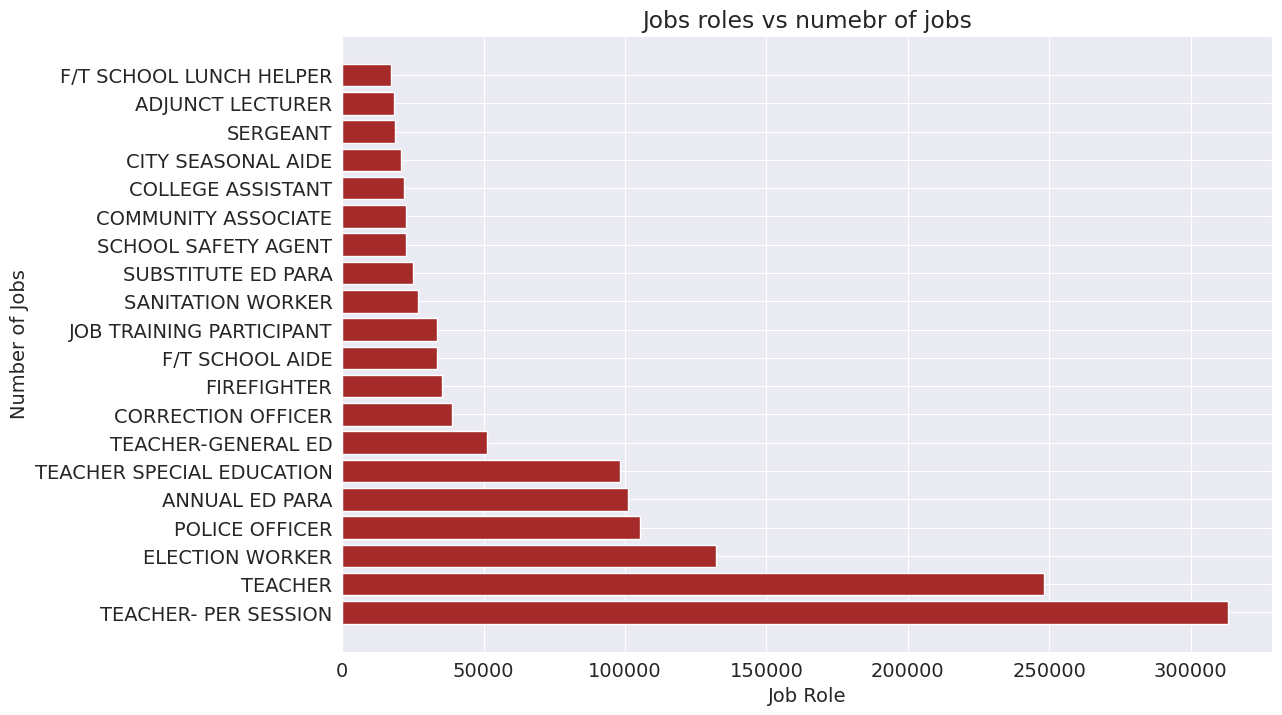

In [ ]:
plt.barh(job_df['Title Description'],job_df['Number of Jobs'],color='brown',align='center')

plt.xlabel('Job Role')
plt.ylabel('Number of Jobs')
plt.title('Jobs roles vs numebr of jobs')

plt.show()

`observation :`

- Teacher is the most employed job role in New York City with over 500000 number of employees followed by Police Personnel.

**Question 9 :** _Which jobs offer most bonuses and over time Pay?_

In [ ]:
bonus_df=df.groupby('Title Description').agg({'Total Other Pay':'mean','Total OT Paid':'mean'}).reset_index()
bonus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title Description  1640 non-null   object 
 1   Total Other Pay    1640 non-null   float32
 2   Total OT Paid      1640 non-null   float32
dtypes: float32(2), object(1)
memory usage: 25.8+ KB


In [ ]:
bonus_df['Bonus Pay'] = bonus_df.apply(lambda x: float(x['Total Other Pay']) + float(x['Total OT Paid']), axis=1)
bonus_df=bonus_df.sort_values('Bonus Pay',ascending = False).head(20)

In [ ]:
fig = px.bar(bonus_df, y='Bonus Pay', x='Title Description', text_auto='.2s',
            title="Jobs with highest average of Bonus Pay")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_traces(marker_color='lightgray', marker_line_width=2, marker_line_color='black')
fig.show()

`observation :`

- Senior System Analysts get paid maximum bonus pay of 78k per annum.

**Question 10 :** _How many number of Agencies started over the years?_ 

In [ ]:
df_copy=df.copy()

In [ ]:
df_copy['Start Year']=df_copy["Agency Start Date"].dt.year

In [ ]:
year_df=df_copy.groupby('Start Year')['Agency Name'].nunique().sort_values(ascending=True).reset_index()
year_df['Start Year']=year_df['Start Year'].astype(int)
year_df = year_df[year_df['Start Year'] <= 2017]
year_df=year_df.rename(columns={'Agency Name':'Agency count'})

In [ ]:
year_df

,Start Year,Agency count
0,1901,1
1,1951,1
2,1950,1
3,1949,1
5,1946,1
...,...,...
71,2013,106
72,2015,108
73,2012,109
74,2014,110


In [ ]:
fig = px.line(year_df, x='Start Year', y='Agency count', title='Number of Agencies between 1954-2017')
fig.update_traces(line=dict(color='Black', width=3))
fig.update_layout(
    plot_bgcolor='lightgray',     
    yaxis_title='Agency count',    
    font=dict(family='Courier new,monospace', size=15, color='#000000') 
)
# Show the plot
fig.show()

`observation :`

-  Maximum number of agencies were started in 2016 with 113 agencies.

- Over the years, number of agencies have grown steadily.

In [ ]:
df.describe()

,Fiscal Year,Base Salary,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,Total_Work_Hours,Total Pay
count,"2,194,475.00","2,194,475.00","2,194,475.00","2,194,475.00","2,194,475.00","2,194,475.00","2,194,475.00","2,194,475.00","2,194,475.00"
mean,"2,015.53","41,100.24",666.05,"40,191.21",59.17,"3,225.45","2,205.39",725.22,"45,515.91"
std,1.11,"39,544.78",887.60,"37,304.53",147.92,"8,825.53","4,886.35",983.38,"44,024.87"
min,"2,014.00",0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.01
25%,"2,015.00",33.18,0.00,"3,563.24",0.00,0.00,0.00,0.00,"3,629.19"
50%,"2,016.00","39,523.00",0.00,"34,716.19",0.00,0.00,0.06,0.00,"36,633.89"
75%,"2,017.00","76,275.00","1,825.00","71,190.01",1.00,179.40,"1,256.42","1,825.00","76,919.30"
max,"2,017.00","350,000.00","4,171.43","672,308.88","3,347.50","228,633.81","281,595.03","5,433.22","672,731.25"


In [ ]:
99883524000.0/2194475.00

45515.908816459516

## **Summary: New York City Payroll Data Analysis** 

We analysed the New York City payroll datset  using Python, Pandas, Matplotlib and Seaborn, Plotly. Here is a summary of the key insights.

Key Metrics:

- Number of Agencies  and Divisions run in New York City under Mayor Office(City Governance) are :- `164`
- The Total Payroll budget for 4 fiscal years is :- `$99 Billion` and average pay of a employee working in NYC Agency is : `$45,541`
- Dataset consists Financical data dating from date :- `01-07-2014` to date:- `06-30-2017` 

We also discovered the following insights from our exploratory data analysis.

`Total Pay :`

- Top 10 job roles are paid 579% higher than average compared to all other jobs.
- Dept of Ed Pedagogical and Police Department have the largest payroll
and highest number of employees. It indicates that New York City focuses its budget on _Education_ and _Civil Protection & Public order_.

`Job Roles :`

- Supervision Jobs have the maximum work hours with over 48 hours work week.
- Supervision jobs roles also get highest bonus pay.

`Borough/Subdistrict :`

- _Manhattan_ has payorll of _$44 Billion_ which constitutes of to almost half or 45% of total payroll in NYC

- _Manhattan_ has over _1.1 million_ employee payroll records meaning that _Manhattan_ also employes highest number of people. This makes Manhattan most important Borough among other Boroughs.

- _Dutchess county_ has highest average pay with _$82,000_ annually.

`Agency/Departments :`

- A total of 164 Agencies are run in New York City and they grown in number over the peroid of year from 1954 to 2017.



## **Future Work**

`Exploratory data analysis` 
- Further analysis on trends
  - Analyse different gender payroll to find gender parity with regard to pay and rate of epmloyement.
- Analyse mutliple data sets over years to budget trends.
- Create and link analysis to dashboards.

## References
- Jovian tutorials
  - [Analyzing Tabular Data with Pandas](https://jovian.ai/aakashns/python-pandas-data-analysis)
  - [Data Visualization using Python, Matplotlib and Seaborn](https://jovian.ai/aakashns/python-matplotlib-data-visualization)
  - [Advanced Data Analysis Techniques with Python & Pandas](https://jovian.ai/aakashns/advanced-data-analysis-pandas)
  - [Exploratory Data Analysis Case Study - Stack Overflow Developer Survey](https://jovian.ai/aakashns/stackoverflow-survey-exploratory-data-analysis)
  -  [Interactive Visualization with Plotly](https://jovian.ai/aakashns/interactive-visualization-plotly)

- [Stackoverflow](https://stackoverflow.com/) hacks, links throughout the notebook
- [Geeks for Geeks](https://www.geeksforgeeks.org/seaborn-heatmap-a-comprehensive-guide/#:~:text=Heatmap%20is%20defined%20as%20a,values%2C%20darker%20colors%20are%20preferred)